In [1]:
import json
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import keras.backend as K
import cv2

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

pip install shap

In [2]:
import shap

In [3]:
# Charger le modèle
model = load_model("/kaggle/input/bootstrap-data/ModelSjogrenn(2).h5")

In [4]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 502, 502, 32)      3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 251, 251, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 245, 245, 32)      50208     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 122, 122, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 116, 32)      50208     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 58, 58, 32)       0

In [5]:
x=np.load("/kaggle/input/bootstrap-data/x_test(2).npy")
y=np.load("/kaggle/input/bootstrap-data/y_test(2).npy")

## Gradient explainer

In [10]:
# Create an explainer object with the GradientExplainer
explainer = shap.GradientExplainer(model,x)

In [14]:
# Compute the SHAP values
shap_values = explainer.shap_values(x[:5])

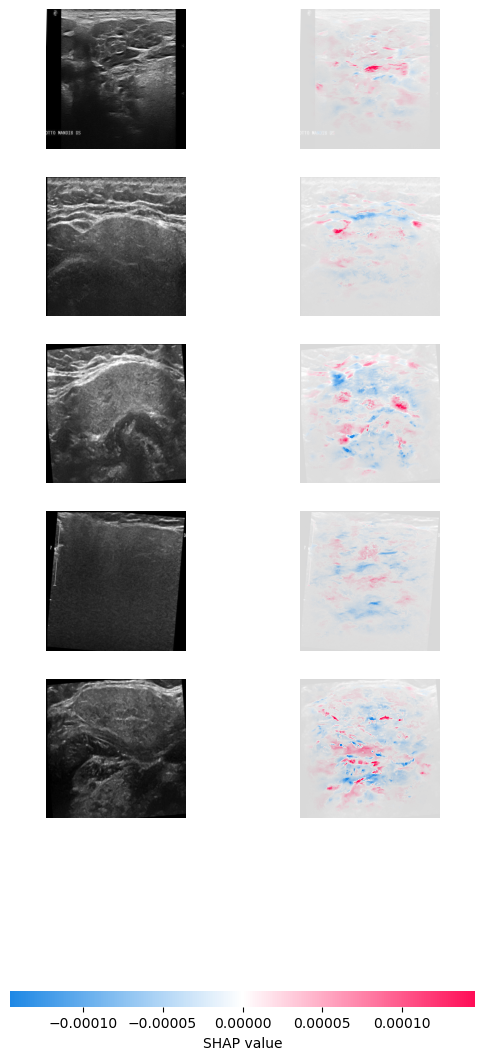

In [15]:
# Plot the global summary of feature importances
shap.image_plot(shap_values, x[:5])

## Explain the model using the Partition explainer

In [7]:
class_names = [0,1]
print("Number of ImageNet classes:", len(class_names))
print("Class names:", class_names)

Number of ImageNet classes: 2
Class names: [0, 1]


In [8]:
# Define the classes you want to explain
class_indices = [0, 1]  # Indices of the classes you want to explain in a binary classification

# Define the function to get the model output
def f(x):
    tmp = x.copy()
    y_pred = model.predict(tmp)
    y_pred_classes = np.where(y_pred>0.5,1.,0)
    return y_pred_classes

# Define the masker for image partitions
masker_blur = shap.maskers.Image("blur(128,128)", x[0].shape)

# Create the explainer with the model and masker
explainer_blur = shap.Explainer(f, masker_blur,output_names = [0, 1])

# Calculate the SHAP values using the explainer
shap_values_fine = explainer_blur(x[1:2], max_evals=500, batch_size=32)


1/1 [==============================] - 3s 3s/step


  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 31ms/step


Partition explainer: 2it [00:22, 22.34s/it]               


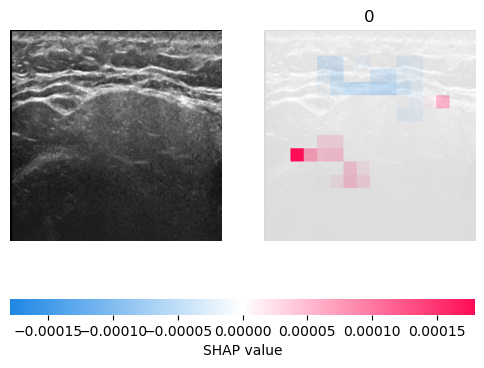

In [9]:
shap.image_plot(shap_values_fine, x[1:2])

 ## DeepExplainer 

In [10]:
x=np.load("/kaggle/input/bootstrap-data/x_test(2).npy")
y=np.load("/kaggle/input/bootstrap-data/y_test(2).npy")

In [15]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import shap
import numpy as np

# explain predictions of the model on three images
e = shap.DeepExplainer(model, x[0:20])
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x[20:23])

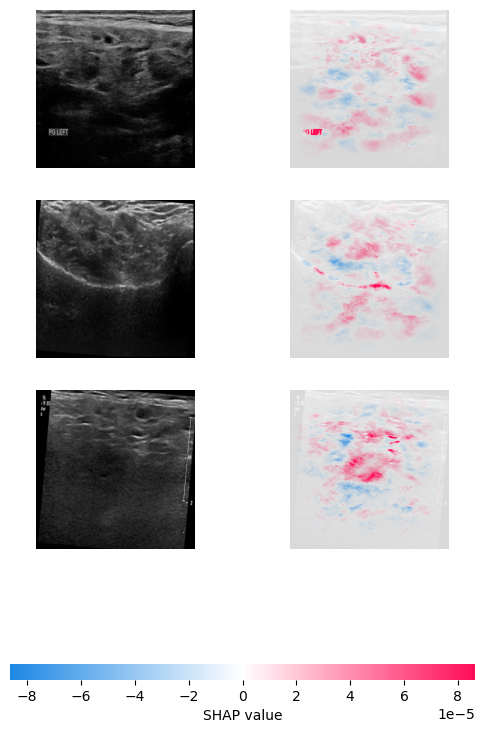

In [18]:
# plot the feature attributions
shap.image_plot(shap_values,x[20:23])

## heatmap